<a href="https://colab.research.google.com/github/Dreeck/ProyectosML/blob/Proyecto1/regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import pandas as pd
from collections import Counter
from google.colab import files
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
import numpy as np


In [ ]:
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv
Saving winequality-white.csv to winequality-white.csv


In [ ]:
df_red = pd.read_csv('winequality-red.csv', sep=';', low_memory=False)
df_white = pd.read_csv('winequality-white.csv', sep=';', low_memory=False)
df_red['wine_type'] = 'red'
df_white['wine_type'] = 'white'

In [ ]:
# Union data set
df = pd.concat([df_red, df_white], axis=0, ignore_index=True)
X = df.drop(columns=['quality', 'wine_type'])
y_regression = df['alcohol']

In [ ]:
# División de los datos en conjunto de entrenamiento y prueba
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2)

In [ ]:
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

In [ ]:
# Modelos de regresión KNN

knn_regressor = KNeighborsRegressor(n_neighbors=5)

knn_cv_scores = cross_val_score(knn_regressor, X_train_reg_scaled, y_train_reg, cv=5, scoring='neg_mean_squared_error')
print(f"Validación cruzada (MSE promedio): {-knn_cv_scores.mean():.4f}")

# Entrenamiento de los modelos
knn_regressor.fit(X_train_reg_scaled, y_train_reg)

y_pred_knn = knn_regressor.predict(X_test_reg_scaled)
mse_knn = mean_squared_error(y_test_reg, y_pred_knn)
r2_knn = r2_score(y_test_reg, y_pred_knn)
print(f"Error cuadrático medio (MSE) en el conjunto de prueba: {mse_knn:.4f}")
print(f"R2 en el conjunto de prueba: {r2_knn:.4f}")

Validación cruzada (MSE promedio): 0.0798
Error cuadrático medio (MSE) en el conjunto de prueba: 0.0756
R2 en el conjunto de prueba: 0.9484


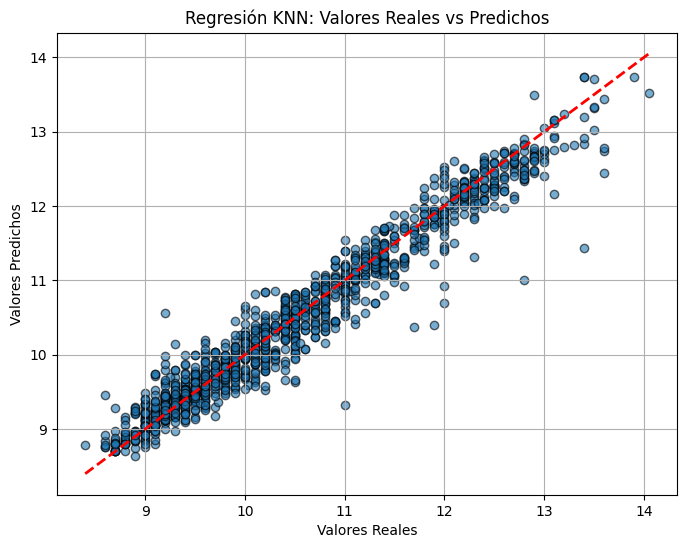

In [ ]:
# Gráfico de dispersión de valores reales vs predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_knn, alpha=0.6, edgecolors='k')
plt.plot([y_test_reg.min(), y_test_reg.max()],
         [y_test_reg.min(), y_test_reg.max()],
         'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Regresión KNN: Valores Reales vs Predichos')
plt.grid(True)
plt.show()

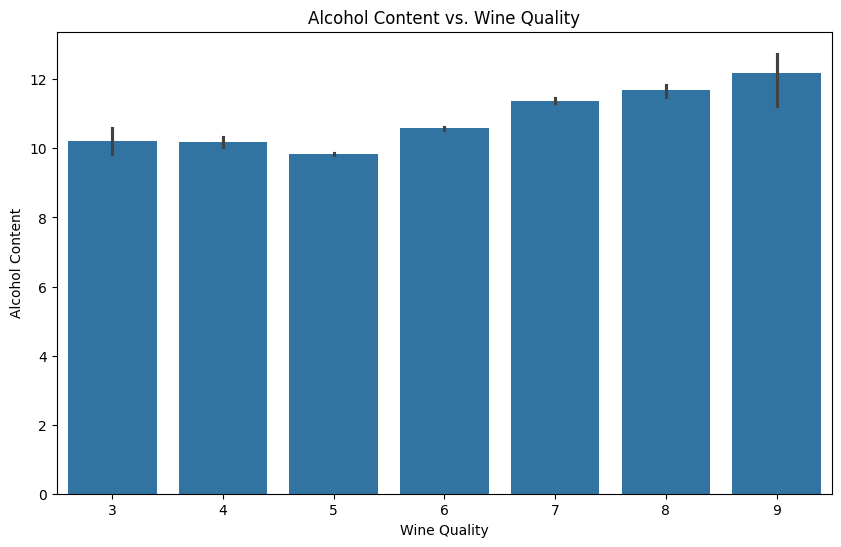

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='alcohol', data=df)
plt.title('Alcohol Content vs. Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol Content')
plt.show()